In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sts
from tqdm import tqdm
from sklearn import metrics
from datetime import timedelta
from numpy import linalg
import statsmodels

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_acf_pacf(http://localhost:8888/notebooks/Desktop/7%20%D1%81%D0%B5%D0%BC/%D0%BC%D0%B0%D0%BA%D1%80%D0%BE%D1%81%D1%82%D0%B0%D1%82/lab5/lab5_ts-Copy1.ipynb#timeseries):
    """
    Функция, отображающая график временного ряда, 
    автокорреляционную функцию(ACF)
    и частную автокорреляционную функцию(PACF).
    """
    fig = plt.figure(figsize=(16,20))
    
    ax0 = fig.add_subplot(311)
    timeseries.plot(ax=ax0)
    ax0.set_title('График временного ряда')
    ax0.set_xlabel('Дата')
    ax0.set_ylabel('Количество новых заболеваний')
    
    ax1 = fig.add_subplot(312)
    fig = sm.graphics.tsa.plot_acf(timeseries, ax=ax1)
    ax1.set_title('Автокорреляционная функция')
    
    ax2 = fig.add_subplot(313)
    fig = sm.graphics.tsa.plot_pacf(timeseries, ax=ax2)
    ax2.set_title('Частная автокорреляционная функция')

def adf_test(timeseries):
    pvalue = sm.tsa.stattools.adfuller(timeseries)[1]
    print("Критерий Дики-Фуллера: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен, нужно большее d")
    else:
        print("Ряд стационарен, d подходит")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='c')[1]
    print("Критерий Дики-Фуллера с константой: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='ct')[1]
    print("Критерий Дики-Фуллера с константой и трендом: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='ctt')[1]
    print("Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='nc')[1]
    print("Критерий Дики-Фуллера без константы и тренда: p=%f" % pvalue)
    if pvalue > 0.05:
        print("Ряд нестационарен")
    else:
        print("Ряд стационарен")

In [3]:
# функция с построением моделей
def adf_test3(timeseries):
    dif_1 = ts.diff().dropna()  
    print('\nШАГ 1')
    print('\nОцениваем модель авторегрессии 1го порядка с трендом и константой')
    print(statsmodels.tsa.ar_model.AutoReg(timeseries,lags=1,trend='ct').fit().summary())
    # проверка гипотезы о равенсте коэф авторегрессии 0
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='ct')[1]
    print("\nКритерий Дики-Фуллера с константой и линейным трендом (о равенсте коэф авторегрессии 0): p=%f" % pvalue)
    if pvalue < 0.05:
        print("\nРяд класса TS")  
    else:
        # нулевая гипотеза принимается 
        print('\nСтроим модель только с трендом и конст, чтобы убедиться, что правильно включили тренд')
        print(statsmodels.tsa.ar_model.AutoReg(dif_1,lags=0,trend='ct').fit().summary()) 
        print("\nЕсли коэффициент при тренде значим, ряд класса DS (случайное блуждание с дрейфом и детерминированным трендом)")         
    
    print('\nШАГ 2')
    print('\nОцениваем модель авторегрессии 1го порядка с константой')
    print(statsmodels.tsa.ar_model.AutoReg(timeseries,lags=1,trend='c').fit().summary())
    # проверка гипотезы о равенсте коэф авторегрессии 0
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='c')[1]
    print("\nКритерий Дики-Фуллера с константой (о равенсте коэф авторегрессии 0): p=%f" % pvalue)
    if pvalue > 0.05:
        # нулевая гипотеза принимается  
        print('\nСтроим модель только с конст, чтобы убедиться, что правильно включили конст')
        print(statsmodels.tsa.ar_model.AutoReg(dif_1,lags=0,trend='c').fit().summary())
        print("\nЕсли коэффициент при константе значим, ряд класса DS (случайное блуждание с дрейфом)")
    else:
        print("\nРяд класса TS (стационарный ряд с ненулевой средней)")
 
    print('\nШАГ 3')
    print('\nОцениваем модель авторегрессии 1го порядка без константы')
    print(statsmodels.tsa.ar_model.AutoReg(timeseries,lags=1,trend='n').fit().summary())
    # проверка гипотезы о равенсте коэф авторегрессии 0
    pvalue = sm.tsa.stattools.adfuller(timeseries, regression='nc')[1]
    print("\nКритерий Дики-Фуллера без константы и тренда (о равенсте коэф авторегрессии 0): p=%f" % pvalue)
    if pvalue > 0.05:
        # нулевая гипотеза принимается 
        print("\nРяд класса DS (случайное блуждание без дрейфа)")  
    else:
        print("\nРяд класса TS (процесс AR с нулевым мат ожиданием)")

# Загрузка данных

In [4]:
ts = pd.read_excel('owid-covid-data.xlsx', sheet_name='Бельгия', index_col='date', parse_dates=['date'])['new_cases'].dropna() # !!!!!!!!!!
print(f"Длина временного ряда: {ts.shape[0]}")
ts = ts.resample('1W').mean()[:-1]
ts.head(15)

Длина временного ряда: 676


date
2020-02-09       0.166667
2020-02-16       0.000000
2020-02-23       0.000000
2020-03-01       0.142857
2020-03-08      28.285714
2020-03-15      98.000000
2020-03-22     359.285714
2020-03-29    1062.142857
2020-04-05    1265.000000
2020-04-12    1422.285714
2020-04-19    1264.142857
2020-04-26    1091.142857
2020-05-03     538.857143
2020-05-10     453.571429
2020-05-17     314.142857
Freq: W-SUN, Name: new_cases, dtype: float64

Text(0, 0.5, 'Количество новых заболеваний')

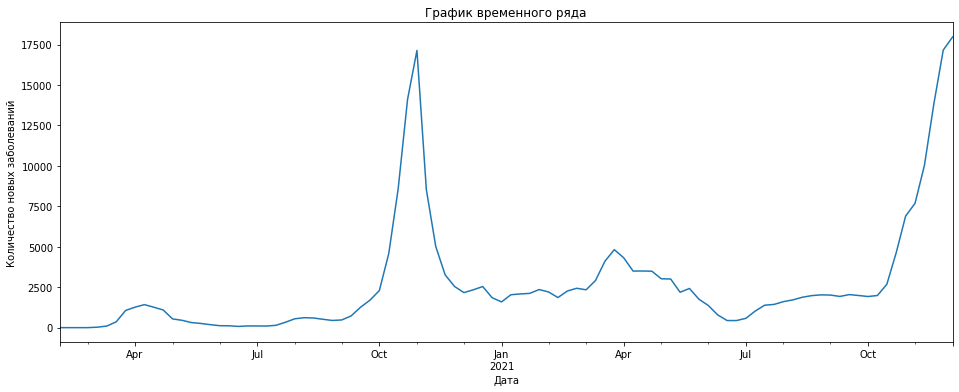

In [5]:
fig = plt.figure(figsize=(16,20))
    
ax0 = fig.add_subplot(311)
ts.plot(ax=ax0)
ax0.set_title('График временного ряда')
ax0.set_xlabel('Дата')
ax0.set_ylabel('Количество новых заболеваний')

# Определение типа ряда

In [6]:
import statsmodels.tsa.ar_model

In [7]:
adf_test3(ts)


ШАГ 1

Оцениваем модель авторегрессии 1го порядка с трендом и константой
                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                   96
Model:                     AutoReg(1)   Log Likelihood                -824.733
Method:               Conditional MLE   S.D. of innovations           1425.756
Date:                Sun, 19 Dec 2021   AIC                           1657.465
Time:                        11:24:04   BIC                           1667.681
Sample:                    02-16-2020   HQIC                          1661.593
                         - 12-05-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -219.7536    299.769     -0.733      0.464    -807.290     367.783
trend            9.1225      5.776      1.579      

# Определение порядка разности d и компонент p, q.

### График временного ряда, АКФ и ЧАКФ

Критерий Дики-Фуллера: p=0.600295
Ряд нестационарен, нужно большее d
Критерий Дики-Фуллера с константой: p=0.600295
Ряд нестационарен
Критерий Дики-Фуллера с константой и трендом: p=0.192744
Ряд нестационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.899869
Ряд нестационарен
Критерий Дики-Фуллера без константы и тренда: p=0.523516
Ряд нестационарен


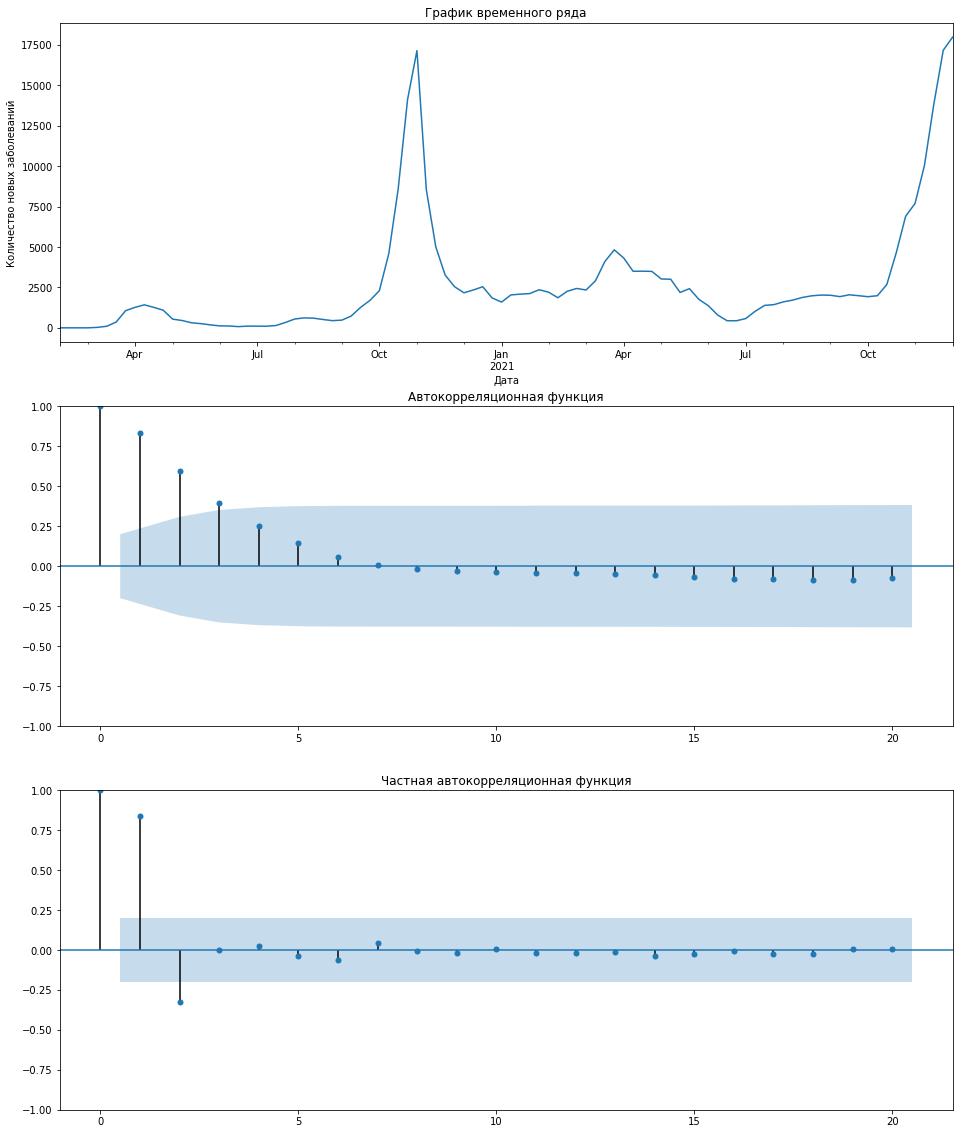

In [8]:
adf_test(ts)
plot_acf_pacf(ts)

### График первых разностей

Критерий Дики-Фуллера: p=0.000000
Ряд стационарен, d подходит
Критерий Дики-Фуллера с константой: p=0.000000
Ряд стационарен
Критерий Дики-Фуллера с константой и трендом: p=0.000001
Ряд стационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.000001
Ряд стационарен
Критерий Дики-Фуллера без константы и тренда: p=0.000000
Ряд стационарен


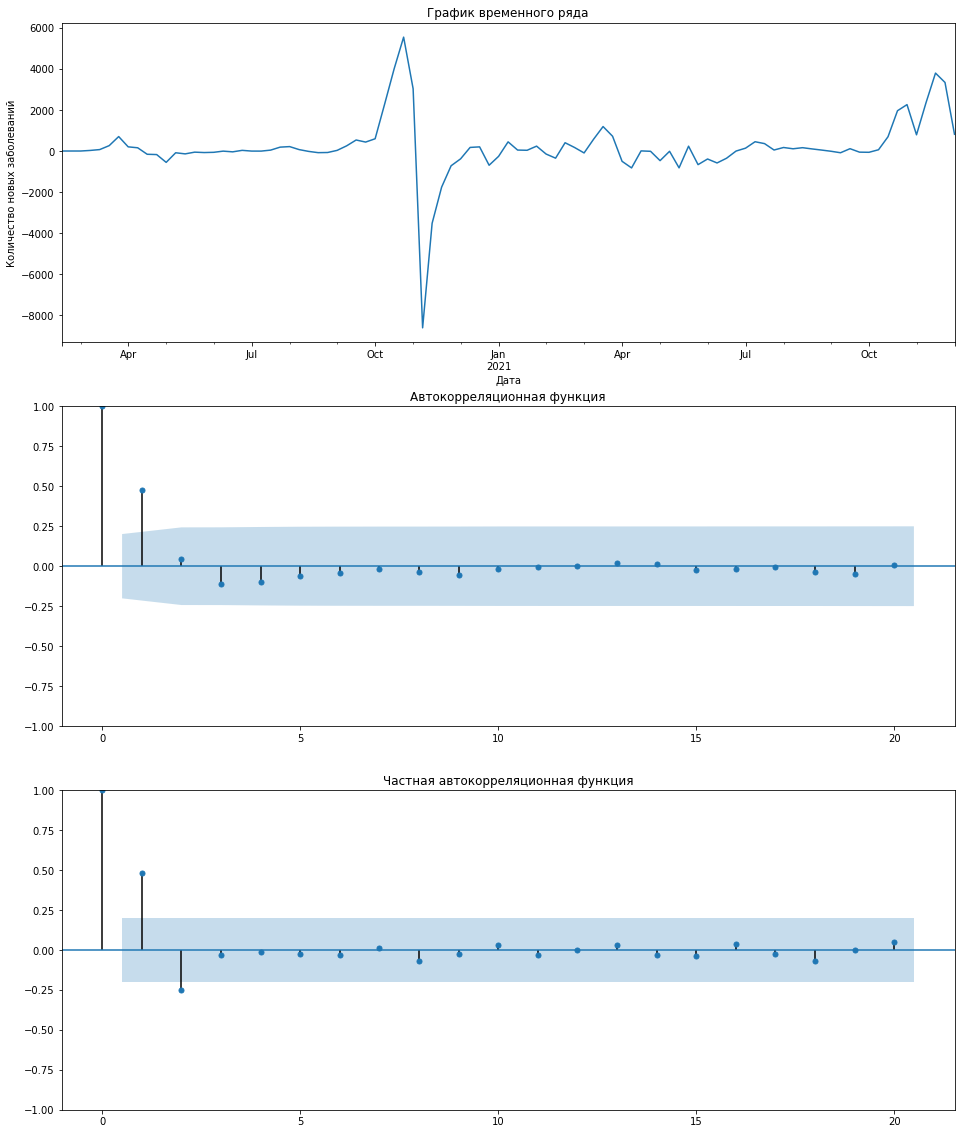

In [9]:
dif_1 = ts.diff().dropna()
adf_test(dif_1)
plot_acf_pacf(dif_1)

### График вторых разностей

Критерий Дики-Фуллера: p=0.000000
Ряд стационарен, d подходит
Критерий Дики-Фуллера с константой: p=0.000000
Ряд стационарен
Критерий Дики-Фуллера с константой и трендом: p=0.000000
Ряд стационарен
Критерий Дики-Фуллера с константой, линейным и квадратичным трендом: p=0.000002
Ряд стационарен
Критерий Дики-Фуллера без константы и тренда: p=0.000000
Ряд стационарен


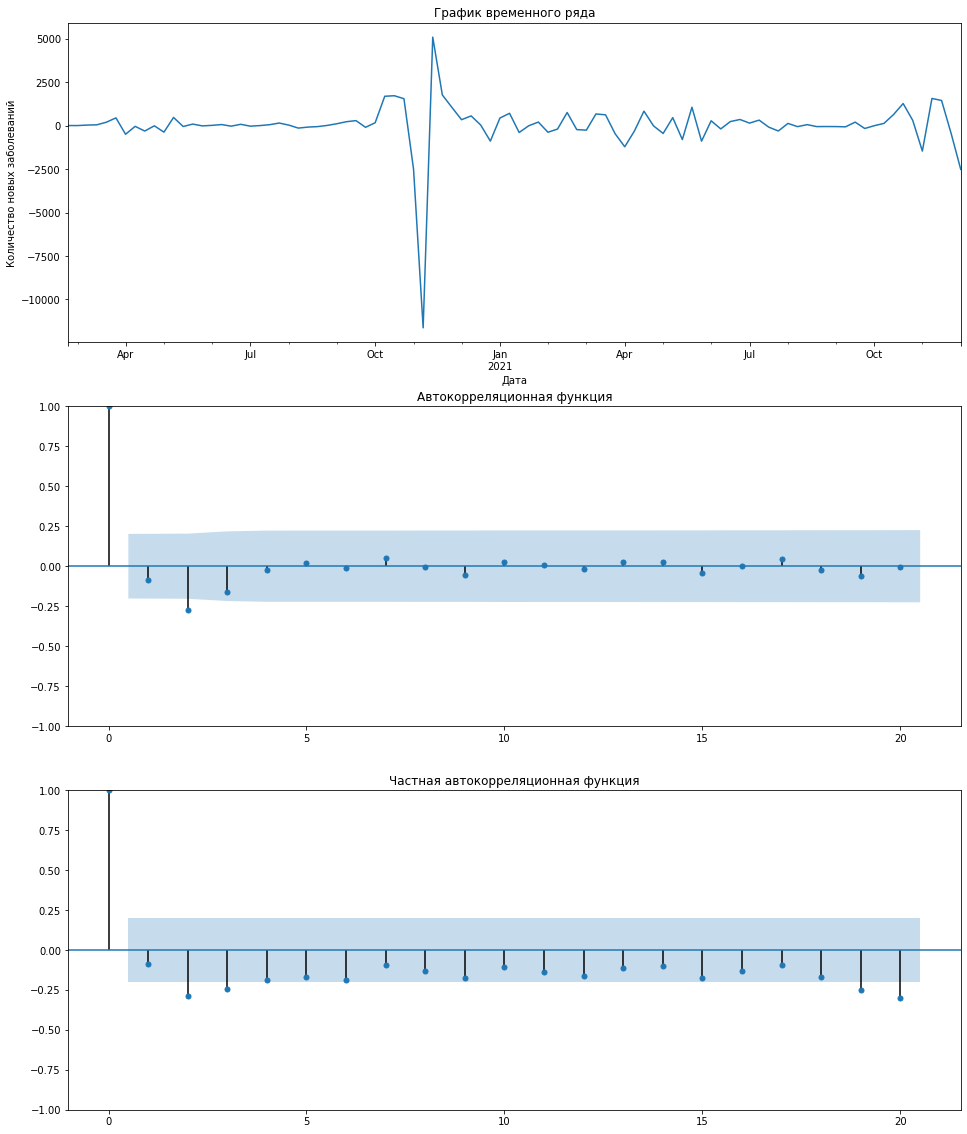

In [10]:
dif_2 = ts.diff().diff().dropna()
adf_test(dif_2)
plot_acf_pacf(dif_2)

### p и q определяются по графикам АКФ и ЧАКФ для подходящего значения d

# Оценка параметров моделей

* Log Lokehood - логарифм правдоподобия
* S.D. of inovations - стандартная ошибка модели
* AIC - информационный критерий Аккаике
* BIC - информационный критерий Байеса
* HQIC - информационный критерий Хеннана-Куинна
* coef - значение коэффициента
* P>|z| - p-value для гипотезы о незначимости коэффициента (если больше 0.05 - незначим)

# Поиск 5 лучших моделей: перебор параметров

In [11]:
d = range(0, 4)
q = range(0, 8)
p = range(0, 8)

from itertools import product

parameters = list(product(p,d,q))
len(parameters)

256

In [12]:
# Может выполняться несколько минут
results = []
best_bic = float("inf")

for param in tqdm(parameters):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model = sm.tsa.ARIMA(ts, order=param).fit()
    except (ValueError, linalg.LinAlgError):
        continue
    bic = model.bic
    #сохраняем лучшую модель, bic, параметры
    if bic < best_bic:
        best_model = model
        best_bic = bic
        best_param = param
    results.append([param, model.bic])

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'bic']
result_table.sort_values(by = 'bic', ascending=True).head(5)

100%|██████████| 256/256 [01:14<00:00,  3.45it/s]


,parameters,bic
27,"(0, 3, 3)",1619.802523
28,"(0, 3, 4)",1622.038829
59,"(1, 3, 3)",1622.555083
90,"(2, 3, 2)",1622.665600
18,"(0, 2, 2)",1625.261992


### Для начала поработаем с лучшей моделью (можно указать любую модель из 5)

In [13]:
model = sm.tsa.ARIMA(ts, order=(0, 2, 2)).fit() # !!!!!!!!!!!
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_cases   No. Observations:                   96
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -805.816
Date:                Sun, 19 Dec 2021   AIC                           1617.632
Time:                        11:25:20   BIC                           1625.262
Sample:                    02-09-2020   HQIC                          1620.714
                         - 12-05-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4807      0.098     -4.917      0.000      -0.672      -0.289
ma.L2         -0.5188      0.072     -7.253      0.000      -0.659      -0.379
sigma2      1.579e+06   4.42e-08   3.57e+13      0.000    1.58e+06    1.58e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):              4204.68
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):              19.52   Skew:                            -3.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.52e+28. Standard errors may be unstable.
"""

---

# Проверка адекватности модели

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

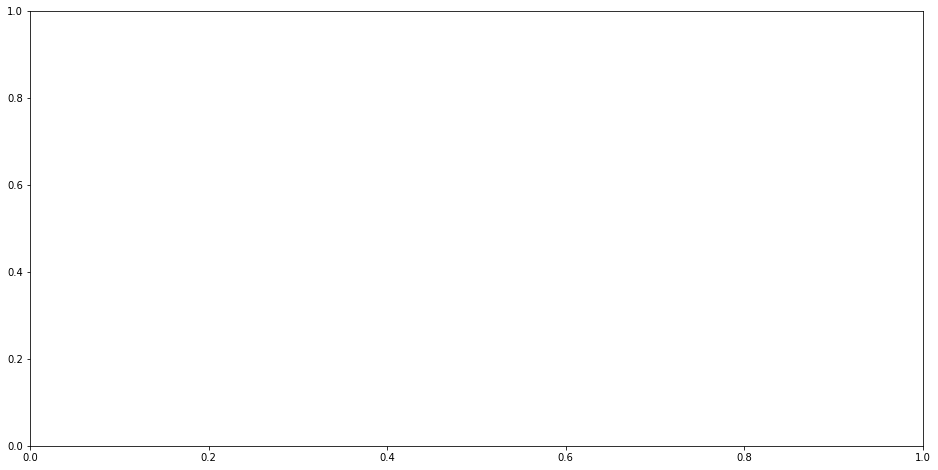

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
model.plot_predict(ax=ax)
fig.show()

In [15]:
pred = model.predict(typ='levels')
print('MSE =', metrics.mean_squared_error(ts[2:], pred))
print('RMSE =', np.sqrt(metrics.mean_squared_error(ts[2:], pred)))
print('MAE =', metrics.mean_absolute_error(ts[2:], pred))
print('MAPE =', metrics.mean_absolute_percentage_error(ts[2:], pred))
print('R2 =', metrics.r2_score(ts[2:], pred))

ValueError: Found input variables with inconsistent numbers of samples: [94, 96]

# Проверка нормальности остатков

In [ ]:
resid = pd.DataFrame(model.resid, columns=['residuals']).sort_values(by='residuals')
adf_test(resid)
plot_acf_pacf(resid)

In [ ]:
pvalue = sts.normaltest(resid['residuals'])[1]
print("Тест на нормальность: p = %f" % pvalue)
if pvalue > 0.05:
    print("Распределение остатков нормальное")
else:
    print("Распределение остатков ненормальное")

fig, ax = plt.subplots(figsize=(16,8))
resid.plot.kde(ax=ax)
plt.title('Распределение остатков')
plt.plot(resid, sts.norm.pdf(resid, resid.mean(), resid.std()), label='Нормальное')
plt.legend()
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sm.qqplot(resid['residuals'], loc=resid['residuals'].mean(), scale = resid['residuals'].std(), line='45', ax=ax)
fig.show()

# Предсказание будущих показателей

In [ ]:
model.summary()

In [ ]:
weeks_pred = 2 # количество недель для предсказания !!!!!!!!!!!!!

print("Последняя дата во временном ряду: ", ts.index[-1])
print(f"Предсказание на {weeks_pred} недели, до: {ts.index[-1] + timedelta(weeks=weeks_pred)}")

fig, ax = plt.subplots(figsize=(16,8))
model.plot_predict(start=ts.index[-30], end=(ts.index[-1] + timedelta(weeks=weeks_pred)), ax=ax)
fig.show()

In [ ]:
pred = model.predict(start=ts.index[-1] + timedelta(days=1), end=(ts.index[-1] + timedelta(weeks=weeks_pred)), typ='levels')
pred

# Соберем ансамбль предсказаний

In [ ]:
result_table.sort_values(by = 'bic', ascending=True).head(5)

## Меняем параметры моделей на табличные

In [ ]:
model1 = sm.tsa.ARIMA(ts, order=(1, 2, 1)).fit()
model2 = sm.tsa.ARIMA(ts, order=(0, 2, 4)).fit()
model3 = sm.tsa.ARIMA(ts, order=(0, 2, 5)).fit()
model4 = sm.tsa.ARIMA(ts, order=(0, 2, 2)).fit()
model5 = sm.tsa.ARIMA(ts, order=(0, 2, 1)).fit()

## Сохраняем предсказания ансамбля и доверительные интервалы в Excel-файл

In [ ]:
forecast = pd.DataFrame(index=pred.index)
res1 = model1.forecast(weeks_pred)
res2 = model2.forecast(weeks_pred)
res3 = model3.forecast(weeks_pred)
res4 = model4.forecast(weeks_pred)
res5 = model5.forecast(weeks_pred)
forecast['value1'] = res1[0]
forecast['value2'] = res2[0]
forecast['value3'] = res3[0]
forecast['value4'] = res4[0]
forecast['value5'] = res5[0]
forecast['result'] = (forecast['value1']+forecast['value2']+forecast['value3']+forecast['value4']+forecast['value5'])/5
forecast['left_border'] = [x[0] for x in res1[2]]
forecast['right_border'] = [x[1] for x in res1[2]]
forecast.to_excel('forecast.xlsx')
forecast

# Добавим сезонность и построим SARIMA

Общий вид модели - **SARIMA (p,d,q) (P,D,Q) s**

* p - порядок модели AR
* d - порядок интегрирования
* q - порядок модели MA
* P - порядок сезонной составляющей SAR
* D - порядок интегрирования сезонной составляющей
* Q - порядок сезонной составляющей SMA
* s - размерность сезонности

### Для начала надо провести сдвиг по сезонности, можно попробовать разные, рекомендуемый 4-6 месяцев.

In [ ]:
months_seasonal = 6 # !!!!!!!!!!!!


ts_4m = ts.diff(4*months_seasonal).dropna()
print("Сезонная разность:")
adf_test(ts_4m)

print("-"*30)
dif_4m = ts.diff(4*months_seasonal).diff().dropna()
print("Интегрированная сезонная разность:")
adf_test(dif_4m)

# dif2_4m = ts.diff(30*monhts_seasonal).diff().diff().dropna()
# adf_test(dif2_4m)

fig = plt.figure(figsize=(16,30))
    
ax0 = fig.add_subplot(411)
ts_4m.plot(ax=ax0)
ax0.set_title('Сезонная разность d=0')
ax0.set_xlabel('Дата')
ax0.set_ylabel('Количество новых заболеваний')

ax0 = fig.add_subplot(412)
dif_4m.plot(ax=ax0)
ax0.set_title('Сезонная разность d=1')
ax0.set_xlabel('Дата')
ax0.set_ylabel('Количество новых заболеваний')

ax1 = fig.add_subplot(413)
fig = sm.graphics.tsa.plot_acf(dif_4m, ax=ax1)
ax1.set_title('Автокорреляционная функция')

ax2 = fig.add_subplot(414)
fig = sm.graphics.tsa.plot_pacf(dif_4m, ax=ax2)
ax2.set_title('Частная автокорреляционная функция')

fig.show()

### P и Q определяются по графикам АКФ и ЧАКФ для подходящего значения D сезонной разности

In [ ]:
%%time 

#Модель SARIMA может тренироваться долго - если ставить значения параметров больше 1 время растет в геометрической прогресии... 

p = 1
d = 2
q = 1
P = 1
D = 1
Q = 1
s = 4*months_seasonal

sarima = sm.tsa.statespace.SARIMAX(ts, order=(p, d, q), 
                                seasonal_order=(P, D, Q, s)).fit()
print(sarima.summary()) 

---

# Проверка адекватности сезонной модели

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
pred = sarima.predict(typ='levels')
pred.plot(ax=ax)
ts.plot(ax=ax)
plt.legend()
fig.show()

In [ ]:
print('MSE =', metrics.mean_squared_error(ts, pred))
print('RMSE =', np.sqrt(metrics.mean_squared_error(ts, pred)))
print('MAE =', metrics.mean_absolute_error(ts, pred))
print('MAPE =', metrics.mean_absolute_percentage_error(ts, pred))
print('R2 =', metrics.r2_score(ts, pred))

# Проверка нормальности остатков

In [ ]:
resid = pd.DataFrame(sarima.resid, columns=['residuals']).sort_values(by='residuals')
adf_test(resid)
plot_acf_pacf(resid)

In [ ]:
pvalue = sts.normaltest(resid['residuals'])[1]
print("Тест на нормальность: p = %f" % pvalue)
if pvalue > 0.05:
    print("Распределение остатков нормальное")
else:
    print("Распределение остатков ненормальное")

fig, ax = plt.subplots(figsize=(16,8))
resid.plot.kde(ax=ax)
plt.title('Распределение остатков')
plt.plot(resid, sts.norm.pdf(resid, resid.mean(), resid.std()), label='Нормальное')
plt.legend()
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sm.qqplot(resid['residuals'], loc=resid['residuals'].mean(), scale = resid['residuals'].std(), line='45', ax=ax)
fig.show()

# Предсказание будущих показателей

In [ ]:
sarima.summary()

In [ ]:
weeks_pred = 2 # количество недель для предсказания !!!!!!!!!!!!!

print("Последняя дата во временном ряду: ", ts.index[-1])
print(f"Предсказание на {weeks_pred} недели, до: {ts.index[-1] + timedelta(weeks=weeks_pred)}")

fig, ax = plt.subplots(figsize=(16,8))
pred = sarima.predict(start=ts.index[-20], end=(ts.index[-1] + timedelta(weeks=weeks_pred)), typ='levels')
pred.plot(ax=ax)
ts[-20:-1].plot(ax=ax)
plt.legend()
fig.show()

In [ ]:
pred = sarima.predict(start=ts.index[-1] + timedelta(days=1), end=(ts.index[-1] + timedelta(weeks=weeks_pred)), typ='levels')
pred

## Сохраняем предсказания и доверительные интервалы в Excel-файл

In [ ]:
forecast = pd.DataFrame(columns=['value'], index=pred.index)
res = sarima.forecast(weeks_pred)
forecast['value'] = res
forecast.to_excel('forecast_sarima.xlsx')
forecast